In [36]:
from sklearn.datasets import %matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

SyntaxError: invalid syntax (<ipython-input-36-ba7f353ce03d>, line 1)

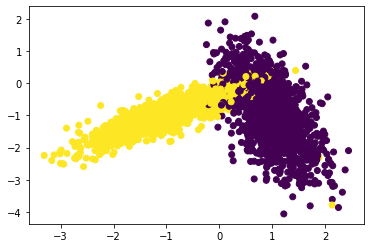

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [118]:
from sklearn.metrics import accuracy_score

def get_test_indices_set(x_train,block_size,j):
    
    if  j==1:
        test_index = [*range(1,int(block_size*len(x_train)))   ]   #first block of CV
    else:
        test_index = [*range( int( block_size*(j-1)  *len(x_train)) , int ((block_size*j)*len(x_train)) )]  #remaining blocks of CV
#     print (test_index)
    return test_index
    
    
    
    
    return sample(range(0, len(x_train)), int(0.6*len(x_train)))

def RandomSearchCV(x_train,y_train,classifier, params, folds):
    trainscores = []
    testscores  = []
    
    par_range = params['n_neighbors']  #range of parameters K
    rand_params = []
    
    for i in range (10):
        rand_params.append(random.randrange(par_range[0] , par_range[1]+1))  #generating 10 random numbers in the specified range and appending to list
   
    for k in tqdm(rand_params):

        trainscores_folds = []
        testscores_folds  = []
        
        block_size = round(float(100/(folds*100)),2)
        
        
        for j in range(0, folds):
            # check this out: https://stackoverflow.com/a/9755548/4084039

            test_indices  = get_test_indices_set(x_train,block_size,j+1)    #getting test indices
            train_indices = list(set(list(range(1, len(x_train)))) - set(test_indices))    #subtracting test indices from train data - k fold train data remains
            print(train_indices[0] , train_indices[-1])
            print(test_indices[0] , test_indices[-1])
            

            # selecting the data points based on the train_indices and test_indices
            X_train = x_train[train_indices]  #Kfold train set x
            
            Y_train = y_train[train_indices]  #Kfold train set y
            
            X_test  = x_train[test_indices]   #CV 
            
            Y_test  = y_train[test_indices]   #CV

            classifier.n_neighbors = k           #hyperparameter k
            
            classifier.fit(X_train,Y_train)       #fit to model

            Y_predicted = classifier.predict(X_test)   #predict CV 
            
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))    #accuracy score CV 

            Y_predicted = classifier.predict(X_train)   #predict train 
            
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))  #accuracy score train 
            
        trainscores.append(np.mean(np.array(trainscores_folds))) #average train set scores
        
        testscores.append(np.mean(np.array(testscores_folds)))  #average CV set scores
        
    return trainscores,testscores, rand_params

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

2475 7499
1 2474
1 7499
2475 4949
1 7499
4950 7424


 10%|████████▎                                                                          | 1/10 [00:01<00:09,  1.05s/it]

2475 7499
1 2474
1 7499
2475 4949
1 7499
4950 7424


 20%|████████████████▌                                                                  | 2/10 [00:01<00:08,  1.01s/it]

2475 7499
1 2474
1 7499
2475 4949
1 7499
4950 7424


 30%|████████████████████████▉                                                          | 3/10 [00:02<00:06,  1.01it/s]

2475 7499
1 2474
1 7499
2475 4949
1 7499
4950 7424


 40%|█████████████████████████████████▏                                                 | 4/10 [00:03<00:06,  1.01s/it]

2475 7499
1 2474
1 7499
2475 4949
1 7499
4950 7424


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:05<00:05,  1.04s/it]

2475 7499
1 2474
1 7499
2475 4949
1 7499
4950 7424


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:05<00:03,  1.00it/s]

2475 7499
1 2474
1 7499
2475 4949
1 7499
4950 7424


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:06<00:02,  1.01it/s]

2475 7499
1 2474
1 7499
2475 4949
1 7499
4950 7424


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:07<00:01,  1.02it/s]

2475 7499
1 2474
1 7499
2475 4949
1 7499
4950 7424


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:08<00:00,  1.03it/s]

2475 7499
1 2474
1 7499
2475 4949
1 7499
4950 7424


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.02it/s]


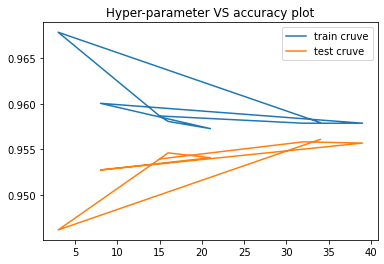

In [119]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()

params_range = {'n_neighbors':(1,50)}
folds = 3

trainscores,testscores,rand_params = RandomSearchCV(X_train, y_train, neigh, params_range, folds)
 

plt.plot(rand_params,trainscores, label='train cruve')
plt.plot(rand_params,testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [95]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

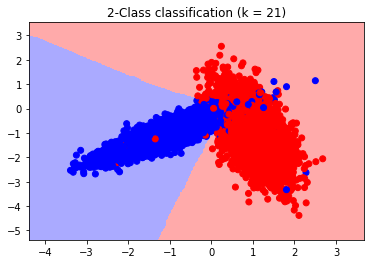

In [96]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 21)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)